In [1]:
# for string matching
import re 

# for reading data
import pandas as pd

# for handling html data
from bs4 import BeautifulSoup

# for visualization
import matplotlib.pyplot as plt  

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv('train_2kmZucJ.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
df.shape

(7920, 3)

In [4]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [5]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [6]:
df.loc[4]['tweet']

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [7]:
df.loc[26]['tweet']

"$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple"

In [8]:
def replace_censored(s):
    return s.replace('$&@*#', 'censored')

In [9]:
df['tweet'] = df['tweet'].apply(replace_censored)

In [10]:
df.loc[26]['tweet']

"censored my ipod is all messed up and i haven't done nothing to it #censored #MyLoss ! #Apple"

In [11]:
def cleaner(text):

  # take off html tags
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
  
  # fetch alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
    text = text.lower()

  # split text into tokens to remove whitespaces
    tokens = text.split()

    return " ".join(tokens)

In [12]:
df['cleaned_tweet'] = df['tweet'].apply(cleaner)

In [13]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
df.loc[0]['cleaned_tweet']

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [15]:
df.loc[1]['tweet']

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [16]:
df.loc[1]['cleaned_tweet']

'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias'

In [17]:
df['len'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

In [18]:
df.head()

,id,label,tweet,cleaned_tweet,len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,12
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,14
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,14
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i m wired i know i m george i was made that way iphone cute daventry home,17
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple won t even talk to me about a question i have unless i pay them for their stupid support,23


In [19]:
df['len'].max()

55

(array([2.000e+00, 1.483e+03, 3.733e+03, 1.605e+03, 6.260e+02, 2.660e+02,
        1.300e+02, 5.700e+01, 1.400e+01, 4.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <BarContainer object of 10 artists>)

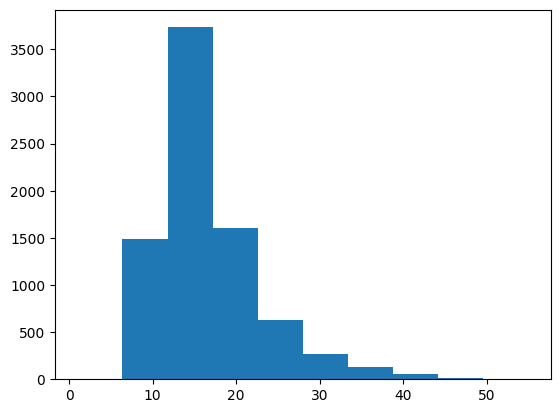

In [20]:
plt.hist(x=df['len'].values)

In [21]:
for i in range(0, 100, 10):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

0th percentile is 1.0
10th percentile is 11.0
20th percentile is 12.0
30th percentile is 13.0
40th percentile is 14.0
50th percentile is 15.0
60th percentile is 16.0
70th percentile is 18.0
80th percentile is 21.0
90th percentile is 24.0


In [22]:
for i in range(91, 101, 1):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

91th percentile is 25.0
92th percentile is 25.0
93th percentile is 26.0
94th percentile is 27.0
95th percentile is 29.0
96th percentile is 31.0
97th percentile is 33.0
98th percentile is 35.0
99th percentile is 38.0
100th percentile is 55.0


In [23]:
X = df['cleaned_tweet']
y = df['label'].values

In [24]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

In [25]:
x_tr.head()

862                                           good birthday purchase happy with it applewatch spacegray applewatchsport sport apple
6249     iphone screwed hung on update now seems to be hung on restoring iphone software apple ihateapple macssuck for good measure
2761       sunset one minute ago samsung europe zeeland brouwersdam stormhour earthandclouds mooieluchten pic twitter com ad ycobxh
7496    yeah bb sucks iphone rt m nstre i love how since i ve had my bb i have yet to send images without a single issue f k you bb
2141                                                            how can the iphone seriously go from to in an hour you iphone apple
Name: cleaned_tweet, dtype: object

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

#prepare a tokenizer
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(x_tr)

In [27]:
x_tokenizer.word_index

{'iphone': 1,
 'apple': 2,
 'i': 3,
 'my': 4,
 'the': 5,
 'to': 6,
 'a': 7,
 'samsung': 8,
 'and': 9,
 'it': 10,
 'new': 11,
 'twitter': 12,
 'for': 13,
 's': 14,
 'you': 15,
 'me': 16,
 'com': 17,
 'phone': 18,
 'is': 19,
 'sony': 20,
 'follow': 21,
 'in': 22,
 'on': 23,
 'of': 24,
 'this': 25,
 't': 26,
 'pic': 27,
 'with': 28,
 'ipad': 29,
 'like': 30,
 'so': 31,
 'love': 32,
 'just': 33,
 'at': 34,
 'have': 35,
 'ios': 36,
 'android': 37,
 'life': 38,
 'rt': 39,
 'now': 40,
 'that': 41,
 'all': 42,
 'your': 43,
 'day': 44,
 'instagram': 45,
 'an': 46,
 'can': 47,
 'not': 48,
 'm': 49,
 'censored': 50,
 'photo': 51,
 'gain': 52,
 'cute': 53,
 'get': 54,
 'today': 55,
 'galaxy': 56,
 'back': 57,
 'photography': 58,
 'got': 59,
 'case': 60,
 'fun': 61,
 'from': 62,
 'news': 63,
 'be': 64,
 'music': 65,
 'instagood': 66,
 'app': 67,
 'out': 68,
 'time': 69,
 'who': 70,
 'happy': 71,
 'beautiful': 72,
 'fashion': 73,
 'are': 74,
 'but': 75,
 'funny': 76,
 'lol': 77,
 'smile': 78,
 'if':

In [28]:
len(x_tokenizer.word_index)

15307

In [28]:
x_tokenizer.word_counts.items()

odict_items([('good', 153), ('birthday', 163), ('purchase', 17), ('happy', 186), ('with', 486), ('it', 964), ('applewatch', 22), ('spacegray', 4), ('applewatchsport', 2), ('sport', 9), ('apple', 2322), ('iphone', 3370), ('screwed', 3), ('hung', 2), ('on', 588), ('update', 141), ('now', 317), ('seems', 8), ('to', 1515), ('be', 221), ('restoring', 5), ('software', 25), ('ihateapple', 3), ('macssuck', 1), ('for', 895), ('measure', 1), ('sunset', 49), ('one', 167), ('minute', 68), ('ago', 31), ('samsung', 1136), ('europe', 16), ('zeeland', 17), ('brouwersdam', 6), ('stormhour', 8), ('earthandclouds', 4), ('mooieluchten', 2), ('pic', 498), ('twitter', 901), ('com', 836), ('ad', 12), ('ycobxh', 1), ('yeah', 40), ('bb', 6), ('sucks', 42), ('rt', 320), ('m', 267), ('nstre', 1), ('i', 2035), ('love', 353), ('how', 138), ('since', 41), ('ve', 91), ('had', 95), ('my', 1832), ('have', 342), ('yet', 29), ('send', 19), ('images', 19), ('without', 25), ('a', 1154), ('single', 24), ('issue', 6), ('f',

In [29]:
thresh = 3

cnt=0
for key,value in x_tokenizer.word_counts.items():
  if value>=thresh:
    cnt=cnt+1

print(cnt)

3477


In [30]:
# prepare the tokenizer again
x_tokenizer = Tokenizer(num_words=cnt,oov_token='unk')

#prepare vocabulary
x_tokenizer.fit_on_texts(x_tr)

In [31]:
# maximum sequence length allowed
max_len = 24

#convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr_seq = pad_sequences(x_tr_seq,  padding='post', maxlen=max_len)
x_val_seq = pad_sequences(x_val_seq, padding='post', maxlen=max_len)

In [32]:
#no. of unique words
x_voc_size = len(x_tokenizer.word_index) + 1
x_voc_size

15309

In [33]:
x_tr_seq[0]

array([  94,   88,  747,   72,   29,   11,  592, 2161,    1, 1186,    3,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [34]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

In [35]:
import tensorflow as tf

In [36]:
def f1_score_weighted(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred = tf.round(y_pred)

    # Calculate precision and recall
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate F1 score
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    # Calculate weighted F1 score
    weights = K.sum(y_true, axis=0)
    weighted_f1 = K.sum(weights * f1) / K.sum(weights + K.epsilon())

    return weighted_f1


In [37]:
#sequential model
model = Sequential()

#embedding layer
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

#rnn layer
model.add(SimpleRNN(12,activation='relu'))

#dense layer
model.add(Dense(6,activation='relu')) 

#output layer
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 50)            765450    
                                                                 
 simple_rnn (SimpleRNN)      (None, 12)                756       
                                                                 
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 766,291
Trainable params: 766,291
Non-trainable params: 0
_________________________________________________________________


In [39]:
#define optimizer and loss
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[f1_score_weighted])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
#train the model 
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=10, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.6052 - val_accuracy: 0.8598
Epoch 2/10
50/50 [==============================] - 2s 31ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.7298 - val_accuracy: 0.8617
Epoch 3/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.8149 - val_accuracy: 0.8580
Epoch 4/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.9695 - val_accuracy: 0.8561
Epoch 5/10
50/50 [==============================] - 2s 31ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.7350 - val_accuracy: 0.8592
Epoch 6/10
50/50 [==============================] - 1s 30ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.9341 - val_accuracy: 0.8554
Epoch 7/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 1.1840 - val_accuracy: 0.8472
Epoch 8/10
50

In [42]:
model = Sequential()
# model.add(Embedding(x_voc_size, embedding_dim))
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(64))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 50)            765450    
                                                                 
 lstm (LSTM)                 (None, 24, 32)            10624     
                                                                 
 batch_normalization (BatchN  (None, 24, 32)           128       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)               

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[f1_score_weighted])

In [45]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/20
50/50 [==============================] - 22s 181ms/step - loss: 0.4081 - f1_score_weighted: 0.6810 - val_loss: 0.6001 - val_f1_score_weighted: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 4s 88ms/step - loss: 0.2198 - f1_score_weighted: 0.8230 - val_loss: 0.5373 - val_f1_score_weighted: 0.0000e+00
Epoch 3/20
50/50 [==============================] - 4s 89ms/step - loss: 0.1525 - f1_score_weighted: 0.8842 - val_loss: 0.5241 - val_f1_score_weighted: 0.0000e+00
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.1161 - f1_score_weighted: 0.9195 - val_loss: 0.5107 - val_f1_score_weighted: 0.0000e+00
Epoch 5/20
50/50 [==============================] - 5s 101ms/step - loss: 0.0809 - f1_score_weighted: 0.9461 - val_loss: 0.6142 - val_f1_score_weighted: 0.0000e+00
Epoch 6/20
50/50 [==============================] - 5s 92ms/step - loss: 0.0607 - f1_score_weighted: 0.9591 - val_loss: 0.5298 - val_f1_score_weighted: 0.0442
Epoch 7/20
50/50 [====

In [61]:
embedding_dim = 128

model = Sequential()
# model.add(Embedding(x_voc_size, embedding_dim))
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(16, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 24, 50)            765400    
                                                                 
 lstm_8 (LSTM)               (None, 24, 16)            4288      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 16)           64        
 hNormalization)                                                 
                                                                 
 lstm_9 (LSTM)               (None, 32)                6272      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)               

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/20
50/50 [==============================] - 20s 146ms/step - loss: 0.4713 - accuracy: 0.7607 - val_loss: 0.6164 - val_accuracy: 0.7437
Epoch 2/20
50/50 [==============================] - 3s 67ms/step - loss: 0.1984 - accuracy: 0.9295 - val_loss: 0.5534 - val_accuracy: 0.7437
Epoch 3/20
50/50 [==============================] - 3s 67ms/step - loss: 0.0927 - accuracy: 0.9729 - val_loss: 0.5365 - val_accuracy: 0.7437
Epoch 4/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.5045 - val_accuracy: 0.7437
Epoch 5/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0287 - accuracy: 0.9926 - val_loss: 0.5321 - val_accuracy: 0.7443
Epoch 6/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.6244 - val_accuracy: 0.7443
Epoch 7/20
50/50 [==============================] - 4s 76ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 0.5005 - val_accuracy: 0.7708
Epoch 8/20


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score_weighted])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, 
          validation_data=(x_val_seq, y_val), callbacks=[early_stopping, reduce_lr])


Epoch 1/20
50/50 [==============================] - 21s 153ms/step - loss: 1.2864 - f1_score_weighted: 0.5253 - val_loss: 1.1996 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - 4s 75ms/step - loss: 0.8262 - f1_score_weighted: 0.7352 - val_loss: 0.9523 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - 4s 75ms/step - loss: 0.5914 - f1_score_weighted: 0.8304 - val_loss: 0.8710 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - 4s 76ms/step - loss: 0.4257 - f1_score_weighted: 0.8999 - val_loss: 0.9179 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 5/20
50/50 [==============================] - 4s 75ms/step - loss: 0.3192 - f1_score_weighted: 0.9371 - val_loss: 0.9379 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 6/20
50/50 [==============================] - 4s 77ms/step - loss: 0.2550 - f1_score_weighted: 0.9615 - val_loss

In [69]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=40, verbose=1, 
          validation_data=(x_val_seq, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/40
50/50 [==============================] - 4s 89ms/step - loss: 0.1393 - f1_score_weighted: 0.9890 - val_loss: 0.6267 - val_f1_score_weighted: 0.6872 - lr: 1.0000e-04
Epoch 2/40
50/50 [==============================] - 4s 76ms/step - loss: 0.1330 - f1_score_weighted: 0.9889 - val_loss: 0.6325 - val_f1_score_weighted: 0.6821 - lr: 1.0000e-04
Epoch 3/40
50/50 [==============================] - 4s 77ms/step - loss: 0.1237 - f1_score_weighted: 0.9956 - val_loss: 0.6455 - val_f1_score_weighted: 0.6800 - lr: 1.0000e-04
Epoch 4/40
50/50 [==============================] - 4s 80ms/step - loss: 0.1218 - f1_score_weighted: 0.9938 - val_loss: 0.6536 - val_f1_score_weighted: 0.6881 - lr: 1.0000e-04
Epoch 5/40
50/50 [==============================] - 4s 77ms/step - loss: 0.1143 - f1_score_weighted: 0.9951 - val_loss: 0.6551 - val_f1_score_weighted: 0.6872 - lr: 1.0000e-04
Epoch 6/40
50/50 [==============================] - 4s 76ms/step - loss: 0.1123 - f1_score_weighted: 0.9935 - val_loss: 